In [29]:
import numpy as np
import os

# Pour importer le datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Pour visualiser les performances
import matplotlib.pyplot as plt

# Chargement du dataset
#dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample"
#dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/train"
dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample_balanced"

img_size = (224, 224)  # Taille cible
batch_size = 128

train_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=128,
    seed=42
)

class_names = train_ds.class_names
nb_class = len(class_names)


Found 54000 files belonging to 27 classes.


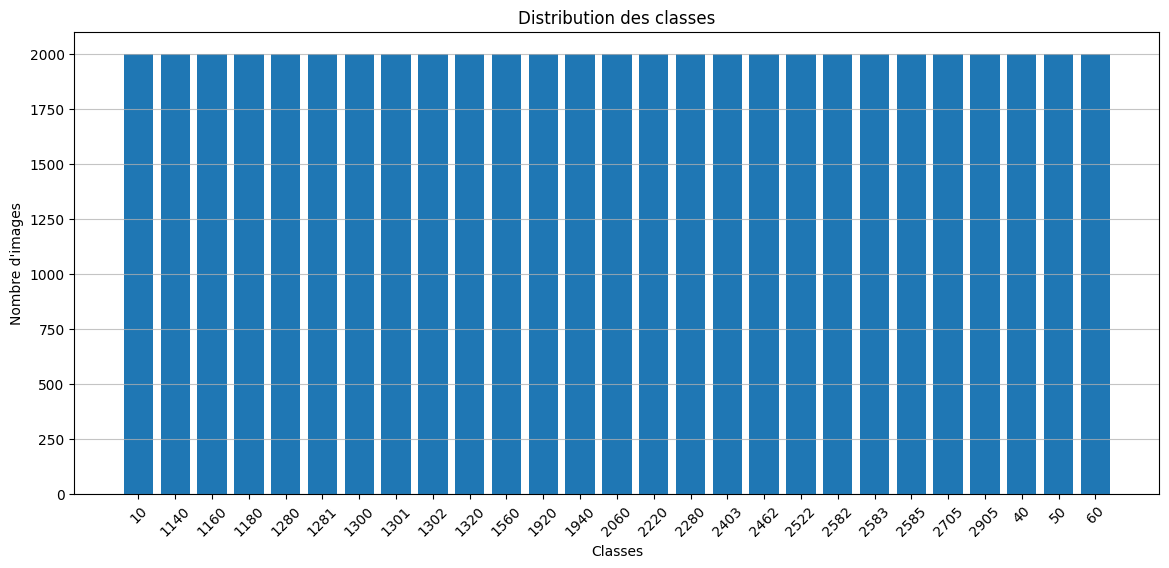

In [30]:
def display_class_distributions(ds):
    # Supposons que vous ayez déjà vos données dans train_ds
    class_labels = []
    
    # Compter les occurrences de chaque classe
    for _, labels in ds:
        class_labels.extend(labels.numpy().tolist())
    
    classes, counts = np.unique(class_labels, return_counts=True)
    
    plt.figure(figsize=(14, 6))
    plt.bar(ds.class_names, counts)
    plt.xlabel('Classes')
    plt.ylabel('Nombre d\'images')
    plt.title('Distribution des classes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    return classes, counts

classes, counts = display_class_distributions(train_ds)

In [4]:
# Identifier les classes minoritaires et majoritaires
threshold = np.median(counts)  # Définir un seuil pour considérer une classe comme minoritaire
minority_classes = [c for c, count in enumerate(counts) if count < threshold]
majority_classes = [c for c, count in enumerate(counts) if count >= threshold]

print(f"Seuil: {threshold}")
print(f"Classes minoritaires: {minority_classes}")
print(f"Classes majoritaires: {majority_classes}")

Seuil: 2558.0
Classes minoritaires: [3, 5, 7, 8, 12, 14, 17, 19, 21, 23, 24, 25, 26]
Classes majoritaires: [0, 1, 2, 4, 6, 9, 10, 11, 13, 15, 16, 18, 20, 22]


In [5]:
def create_balanced_dataset(ds, classes, samples_per_class):
    datasets = []
    
    for class_idx in classes:
        # Filtrer le dataset pour cette classe
        class_ds = ds.filter(lambda x, y: tf.equal(y, class_idx))
        num_samples = class_ds.cardinality().numpy()
        # Sur-échantillonner ou sous-échantillonner selon besoin
        if samples_per_class > num_samples:
            # Sur-échantillonnage (répétition)
            class_ds = class_ds.repeat()
            class_ds = class_ds.take(samples_per_class)
        else:
            # Sous-échantillonnage (limitation)
            class_ds = class_ds.take(samples_per_class)
            
        datasets.append(class_ds)
    
    # Combiner tous les datasets de classes
    balanced_ds = datasets[0]
    for ds in datasets[1:]:
        balanced_ds = balanced_ds.concatenate(ds)
    
    # Mélanger le dataset final
    balanced_ds = balanced_ds

    return balanced_ds

# Utilisation :
target_samples = 2000
balanced_train_ds = create_balanced_dataset(train_ds.unbatch(), classes, target_samples)

In [5]:
#.batch(128).shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
for _, labels in balanced_train_ds.cache().shuffle(buffer_size=1000).batch(128).prefetch(tf.data.AUTOTUNE).take(5):
       print(labels)

2025-03-22 16:57:01.442714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:118: Filling up shuffle buffer (this may take a while): 169 of 1000
2025-03-22 16:57:11.506687: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:118: Filling up shuffle buffer (this may take a while): 771 of 1000
2025-03-22 16:57:08.917785: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(128,), dtype=int32)
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(128,), dtype=int32)
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(128,), dtype=int32)
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

2025-03-22 16:57:28.743665: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-03-22 16:57:28.751937: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
import time
print("start")
start = time.time()
balanced_train_ds =  balanced_train_ds.cache().shuffle(buffer_size=1000).batch(128).prefetch(tf.data.AUTOTUNE)
display_class_distributions(balanced_train_ds)
end = time.time()
print("temps d'exécution:",end-start)

start


2025-03-22 17:14:33.237820: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:118: Filling up shuffle buffer (this may take a while): 344 of 1000
2025-03-22 17:14:43.272420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:118: Filling up shuffle buffer (this may take a while): 940 of 1000
2025-03-22 17:14:37.058137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


In [28]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image

def save_balanced_dataset(balanced_ds, output_dir, class_names, format='jpg'):
    """
    Sauvegarde le dataset équilibré sur le disque
    
    Args:
        balanced_ds: Le dataset TensorFlow équilibré
        output_dir: Répertoire de destination
        format: Format des images (jpg, png)
    """
    # Créer le répertoire principal s'il n'existe pas
    os.makedirs(output_dir, exist_ok=True)
    # Créer un sous-répertoire pour chaque classe
    for class_name in class_names:  # Adapté à vos 27 classes
        class_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
    
    # Compteurs pour suivre le nombre d'images par classe
    counts = {i: 0 for i in range(len(class_names))}
    
    # Parcourir le dataset et sauvegarder chaque image
    for image, label in balanced_ds:
        # Convertir en numpy et s'assurer que les valeurs sont dans [0, 255]
        img_array = image.numpy().astype("uint8")
       
        # Si l'image est normalisée (valeurs entre -1 et 1 ou 0 et 1)
        #if img_array.max() <= 1.0:
        #    img_array = (img_array * 255).astype(np.uint8)

        # Obtenir la classe
        class_idx = int(label.numpy())
        
        # Incrémenter le compteur
        counts[class_idx] += 1
        
        # Définir le chemin de sauvegarde
        img_path = os.path.join(output_dir, class_names[class_idx], f"sample_{counts[class_idx]}.{format}")
        
        # Créer une image PIL et la sauvegarder
        img = Image.fromarray(img_array)
        img.save(img_path)
        
    
    # Afficher les statistiques finales
    print("\nStatistiques de sauvegarde:")
    for class_idx, count in counts.items():
        print(f"Classe {class_idx}: {count} images")
    
    print(f"\nTotal: {sum(counts.values())} images sauvegardées dans {output_dir}")
    
    return counts

output_dir = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample_balanced"

save_balanced_dataset(balanced_train_ds,output_dir, class_names )

2025-03-22 18:24:19.982742: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2025-03-22 18:24:36.014944: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2025-03-22 18:25:10.276138: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budg


Statistiques de sauvegarde:
Classe 0: 2000 images
Classe 1: 2000 images
Classe 2: 2000 images
Classe 3: 2000 images
Classe 4: 2000 images
Classe 5: 2000 images
Classe 6: 2000 images
Classe 7: 2000 images
Classe 8: 2000 images
Classe 9: 2000 images
Classe 10: 2000 images
Classe 11: 2000 images
Classe 12: 2000 images
Classe 13: 2000 images
Classe 14: 2000 images
Classe 15: 2000 images
Classe 16: 2000 images
Classe 17: 2000 images
Classe 18: 2000 images
Classe 19: 2000 images
Classe 20: 2000 images
Classe 21: 2000 images
Classe 22: 2000 images
Classe 23: 2000 images
Classe 24: 2000 images
Classe 25: 2000 images
Classe 26: 2000 images

Total: 54000 images sauvegardées dans /mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample_balanced


{0: 2000,
 1: 2000,
 2: 2000,
 3: 2000,
 4: 2000,
 5: 2000,
 6: 2000,
 7: 2000,
 8: 2000,
 9: 2000,
 10: 2000,
 11: 2000,
 12: 2000,
 13: 2000,
 14: 2000,
 15: 2000,
 16: 2000,
 17: 2000,
 18: 2000,
 19: 2000,
 20: 2000,
 21: 2000,
 22: 2000,
 23: 2000,
 24: 2000,
 25: 2000,
 26: 2000}